# Modeling: Scale, map and mirror bodies

The purpose of this notebook is to demonstrate the ``map()`` and ``scale()`` functions
and their usage for transforming bodies.

In [1]:
# Imports
import numpy as np

from ansys.geometry.core import Modeler
from ansys.geometry.core.math import (
  Frame,
  Plane,
  Point2D,
  Point3D,
  UNITVECTOR3D_X,
  UNITVECTOR3D_Y,
  UNITVECTOR3D_Z,
)
from ansys.geometry.core.sketch import Sketch

In [2]:
# Initialize the modeler for this example notebook
m = Modeler()

## Scale body

The ``scale()`` function is designed to modify the size of 3D bodies by a specified scale
factor. This function is a important part of geometric transformations, allowing for the
dynamic resizing of bodies.

### Usage of ``scale()``

To use the ``scale()`` function, you call it on an instance of a geometry body, passing a
single argument: the scale value. This value is a real number (``Real``) that determines
the factor by which the body's size will be changed.

```python
body.scale(value)
```

### Example: Making a cube

The following code snippets show how to change the size of a cube using the ``scale()``
function in ``Body`` objects. The process involves initializing a sketch design for the
cube, defining the shape parameters, and then performing a rescaling operation to generate
the new shape.

#### Initialize the cube sketch design

A new design sketch named "cube" is created.

In [3]:
design = m.create_design("cube")

#### Define cube parameters

``side_length`` is set to 10 units, representing the side length of the cube.

In [4]:
# Cube parameters
side_length = 10

#### Create the profile cube

A square box is created centered on the origin using ``side_length`` as the side length
of the square.

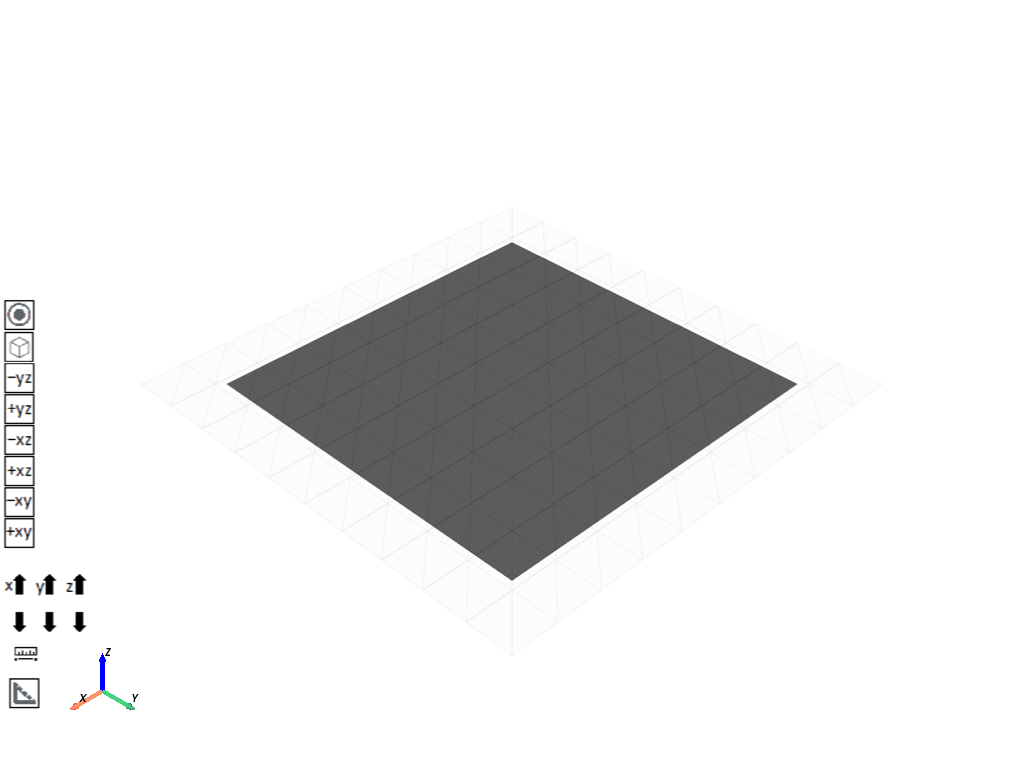

In [5]:
# Square with side length 10
box_sketch = Sketch().box(Point2D([0, 0]), side_length, side_length)

box_sketch.plot()

#### Create cube body

``extrude_sketch`` on the ``box_sketch`` as the base sketch and create the 3D cube with
``distance`` being the ``side_length``.

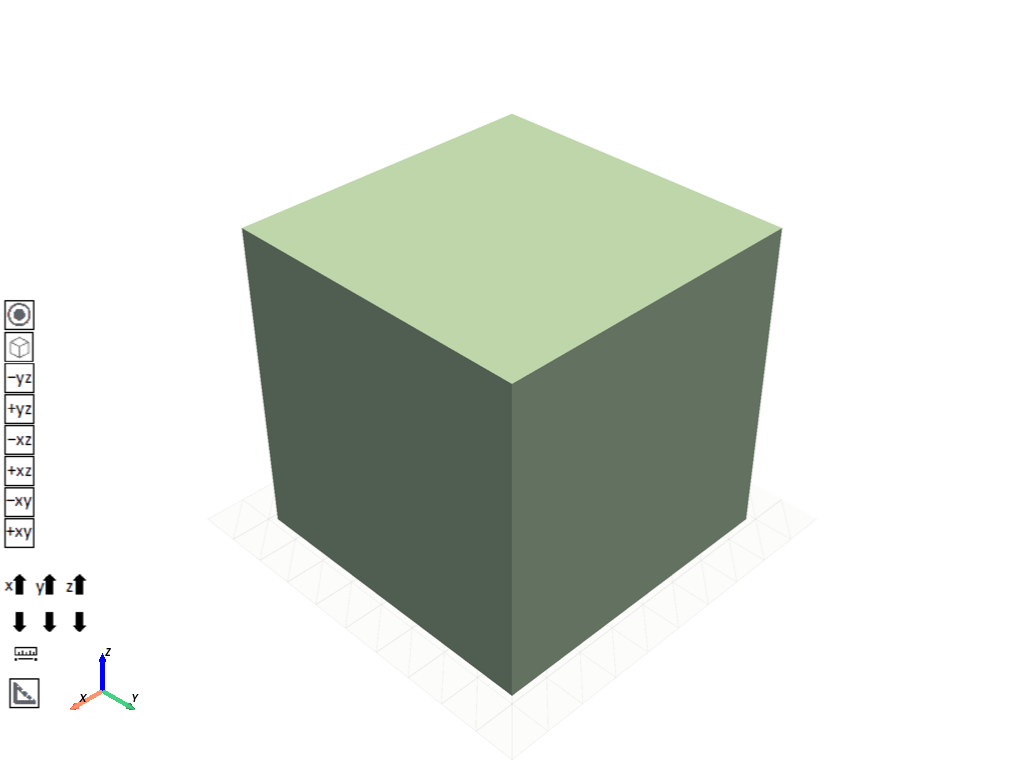

In [6]:
# Extrude the cube profile by a distance of side_length
cube = design.extrude_sketch("box", box_sketch, side_length)

design.plot()

#### Making the cube twice as large

  - Copy the original cube. Using ``scale()`` with a value of 2, double the side lengths of
    the cube, thereby making the body twice as large, and then offset it to view the difference.

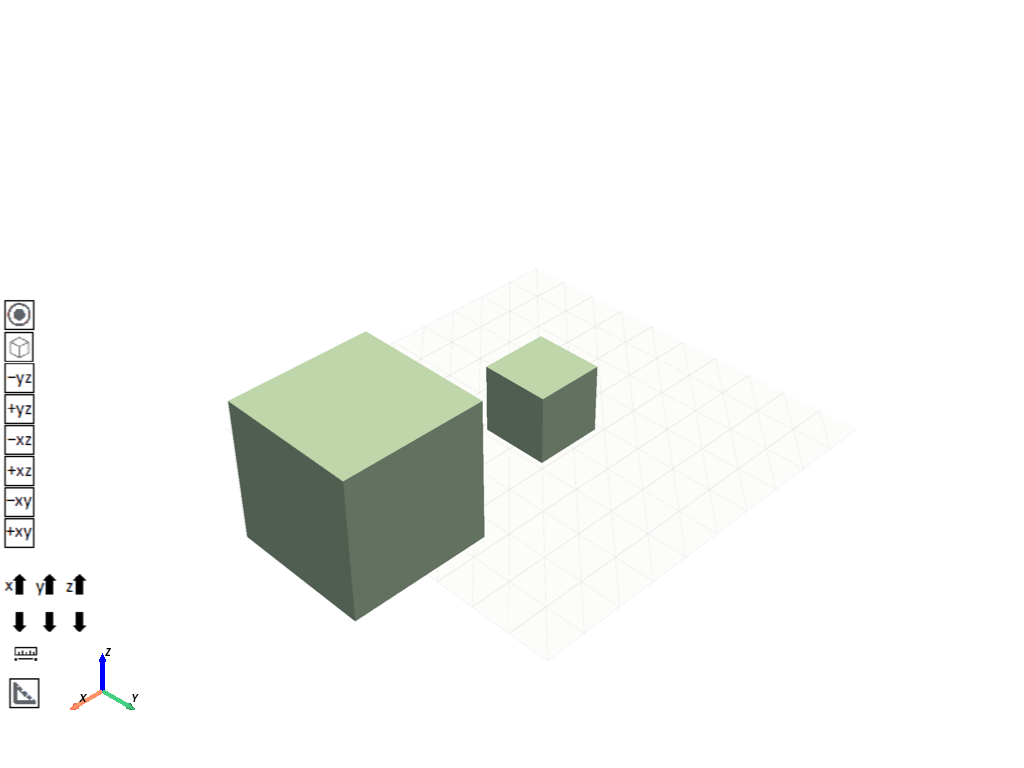

In [7]:
# Copy the original cube
doubled = cube.copy(cube.parent_component, "doubled_box")
# Double the size
doubled.scale(2)
# Translate the copied cube in the x direction
doubled.translate(UNITVECTOR3D_X, 30)

design.plot()

#### Halfing the size of the *original* cube

Copy the original cube. Using ``scale()`` with a value of 0.5 effectively halves the
side lengths of the cube. Then, offset the new cube to view the difference.

Note: Because the size of the cube in the previous cell was doubled, using the 0.25 factor
translates it to half the size of the original cube.

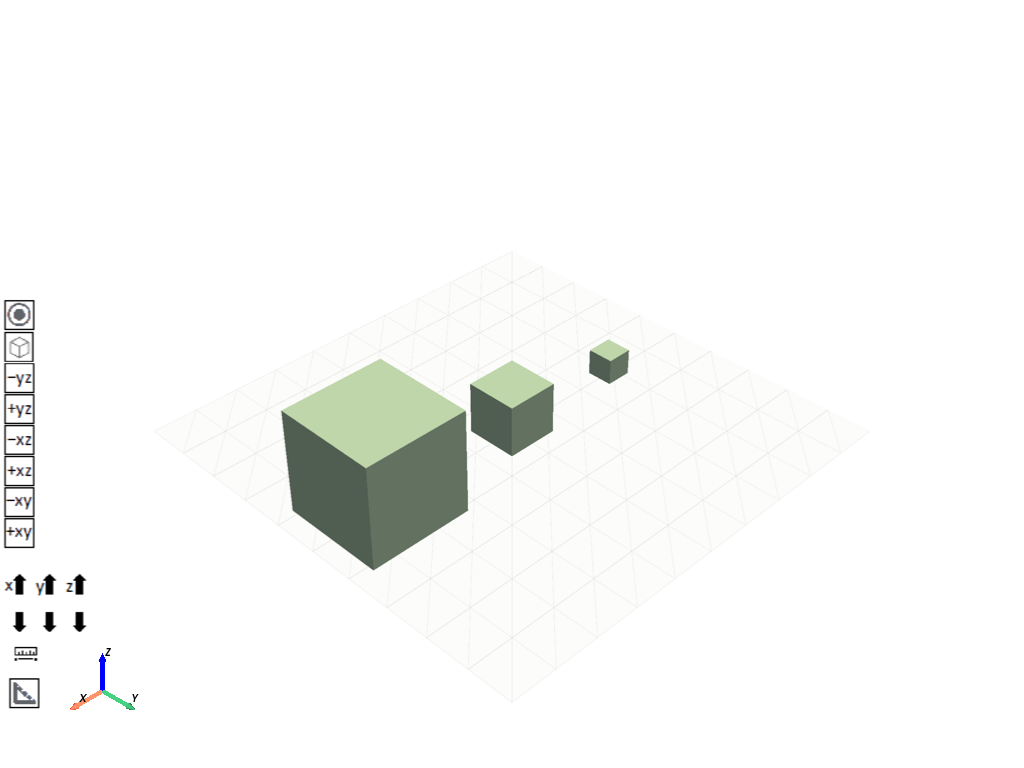

In [8]:
# Copy the original cube
halved = cube.copy(cube.parent_component, "halved_box")
# Half the size
halved.scale(0.5)
# Translate the copied cube in the x direction
halved.translate(UNITVECTOR3D_X, -25)

design.plot()

## Map body

The ``map()`` function enables the reorientation of 3D bodies by mapping them onto a new
specified frame. This function is used for adjusting the orientation of geometric bodies
within 3D space to match specific reference frames. With this function, you are able to
effectively perform translation and rotation operations in a single method by specifying
a new frame.

### Usage of ``map()``

To use the ``map()`` function, invoke it on an instance of a geometry body with a single
argument: the new frame to map the body to. The frame is a structure or object that defines
the new orientation parameters for the body.

```python
body.map(new_frame)
```

### Example: Creating an asymmetric cube

The following code snippets show how to use the ``map()`` function to reframe a cube body in
the ``Body`` object. The process involves initializing a sketch design for the custom body,
extruding the profile by a distance, and then performing the mapping operation to rotate the
shape.

#### Initialize the shape sketch design

A new design sketch named "asymmetric_cube" is created.

In [9]:
# Initialize the sketch design
design = m.create_design("asymmetric_cube")

#### Create an asymmetric sketch profile

Make a sketch profile that is basically a cube centered on the origin with a side length
of 2 with a cutout.

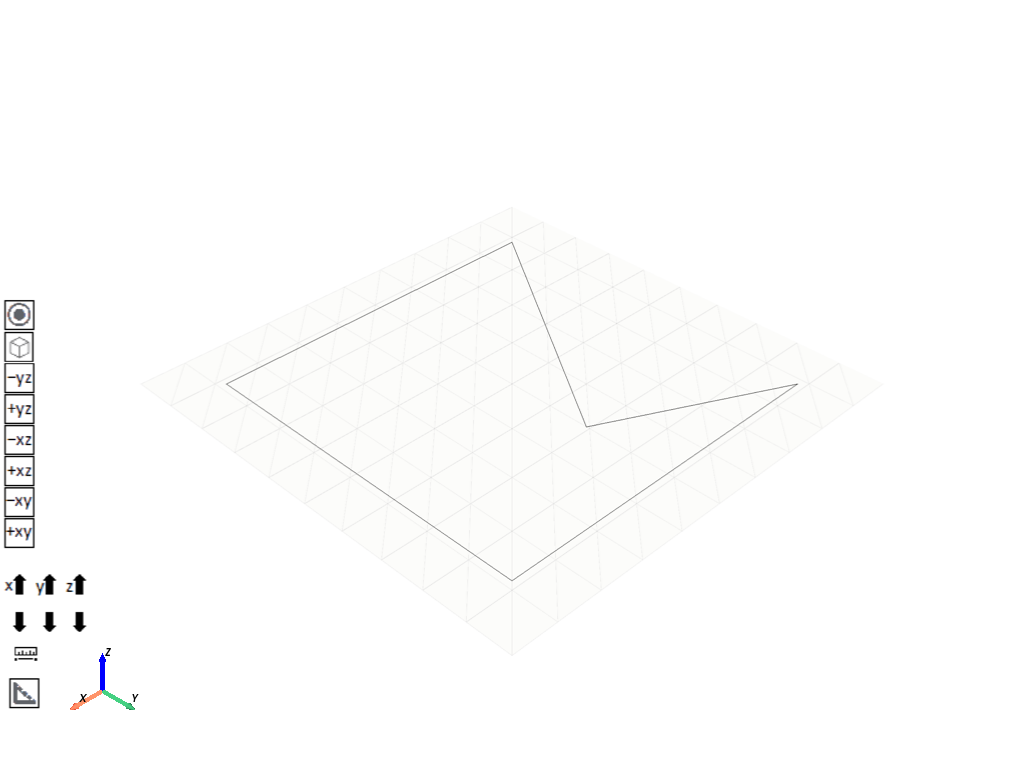

In [10]:
# Create the cube profile with a cut through it
asymmetric_profile = Sketch()
(
   asymmetric_profile.segment(Point2D([1, 1]), Point2D([-1, 1]))
   .segment_to_point(Point2D([0, 0.5]))
   .segment_to_point(Point2D([-1, -1]))
   .segment_to_point(Point2D([1, -1]))
   .segment_to_point(Point2D([1, 1]))
)

asymmetric_profile.plot()

#### Create the asymmetric body

``extrude_sketch`` on the ``asymmetric_profile`` as the base sketch, creating the
3D cube with a cutout, with the ``distance`` being 1.

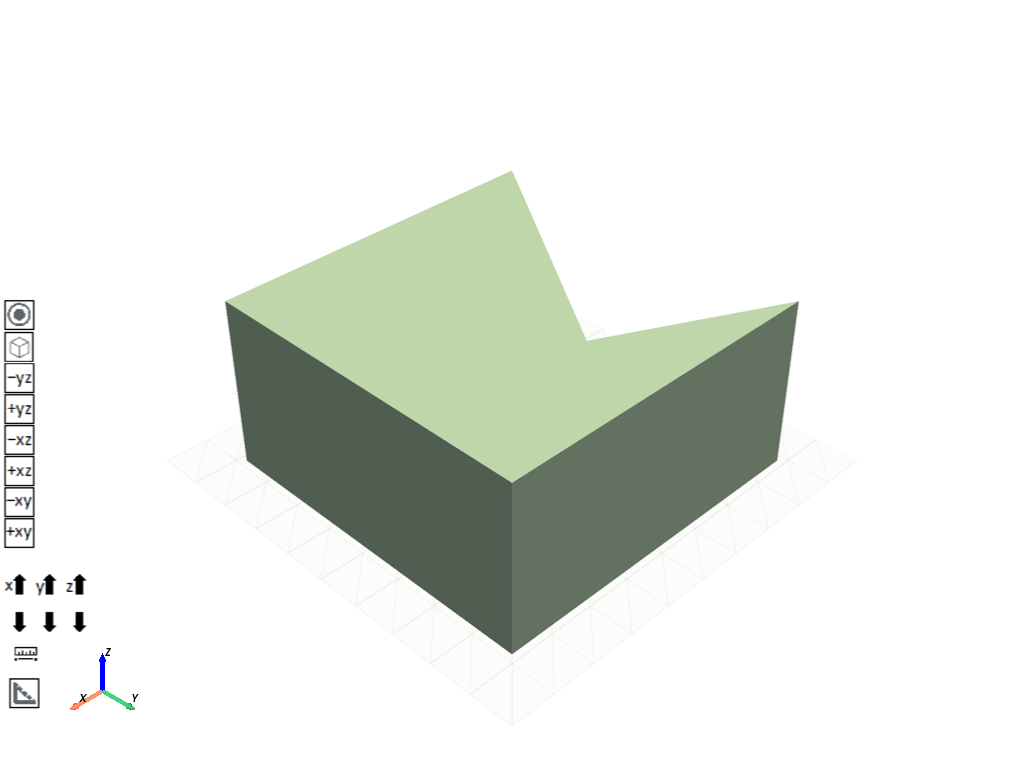

In [11]:
# Extrude the asymmetric profile by a distance of 1 unit
body = design.extrude_sketch("box", asymmetric_profile, 1)

design.plot()

#### Apply map reframing

First make a copy of the shape and translate it in 3D space so that you can view them
side by side. Then, apply the reframing to the copied shape.

Note: The following map uses the default x direction, but the y direction is swapped
with the z direction, effectively rotating the original shape so that it is standing
vertically.

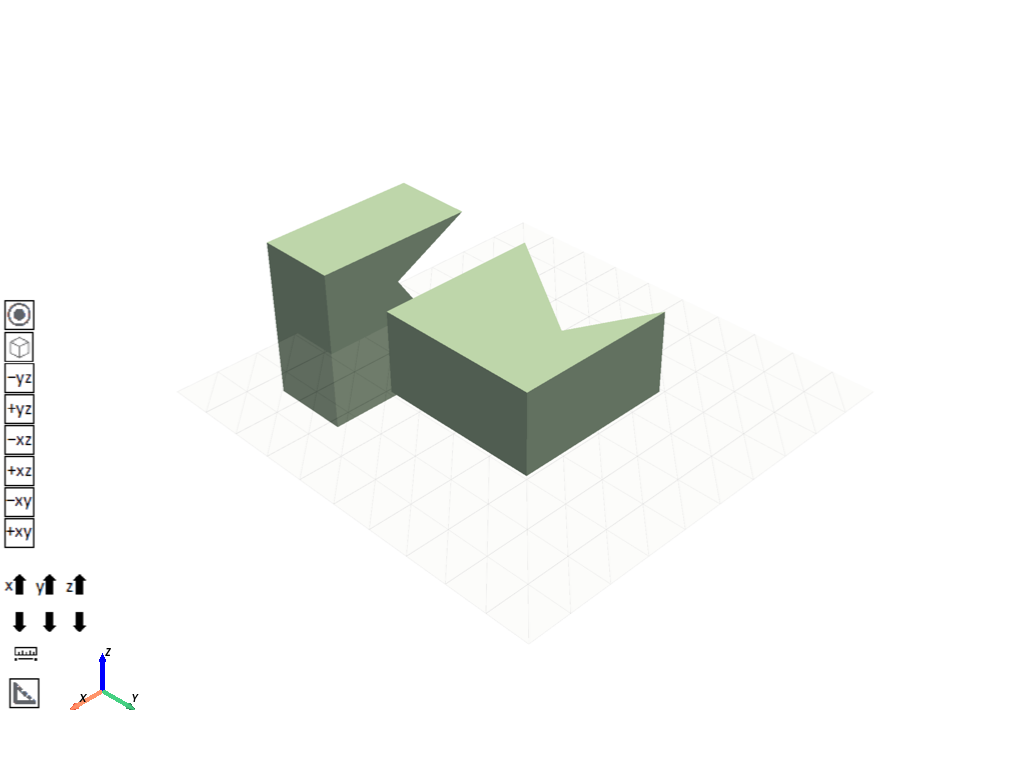

In [12]:
# Copy the body
copied_body = body.copy(body.parent_component, "copied_body")
# Apply the reframing
copied_body.map(Frame(Point3D([0, 0, 0]), UNITVECTOR3D_X, UNITVECTOR3D_Z))
# Shift the new modified body in the plane in the negative y direction by 2 units
copied_body.translate(UNITVECTOR3D_Y, -2)

design.plot()

## Mirror body

The ``mirror()`` function is designed to mirror the geometry of a body across a specified plane.
This function plays a role in geometric transformations, enabling the reflection of bodies to
create symmetrical designs.

### Usage of ``mirror()``

To use the ``mirror()`` function, you call it on an instance of a geometry body, passing a
single argument: the plane across which to mirror the body. This plane is represented by a
``Plane`` object, defining the axis of symmetry for the mirroring operation.

```python
body.mirror(plane)
```

### Example: Triangle body

The following code snippets show how to use the ``mirror()`` function to reframe a cube body
in the ``Body`` object. The process involves initializing a sketch design for the body profile,
extruding the profile by a distance, and then performing the mirroring operation to reflect the
shape over the specified axis.

#### Initialize the shape sketch design

A new design sketch named "triangle" is created.

In [13]:
# Initialize the sketch design
design = m.create_design("triangle")

#### Define parameters

`point1`: First vertex of the triangle.
`point2`: Second vertex of the triangle.
`point3`: Third vertex of the triangle.

In [14]:
point1 = Point2D([5, 0])
point2 = Point2D([2.5, 2.5])
point3 = Point2D([2.5, -2.5])

#### Create triangle sketch profile

Using ``point1``, ``point2``, and ``point3``, define the vertices of the triangle profile
using those three points and then create line segments connecting them.

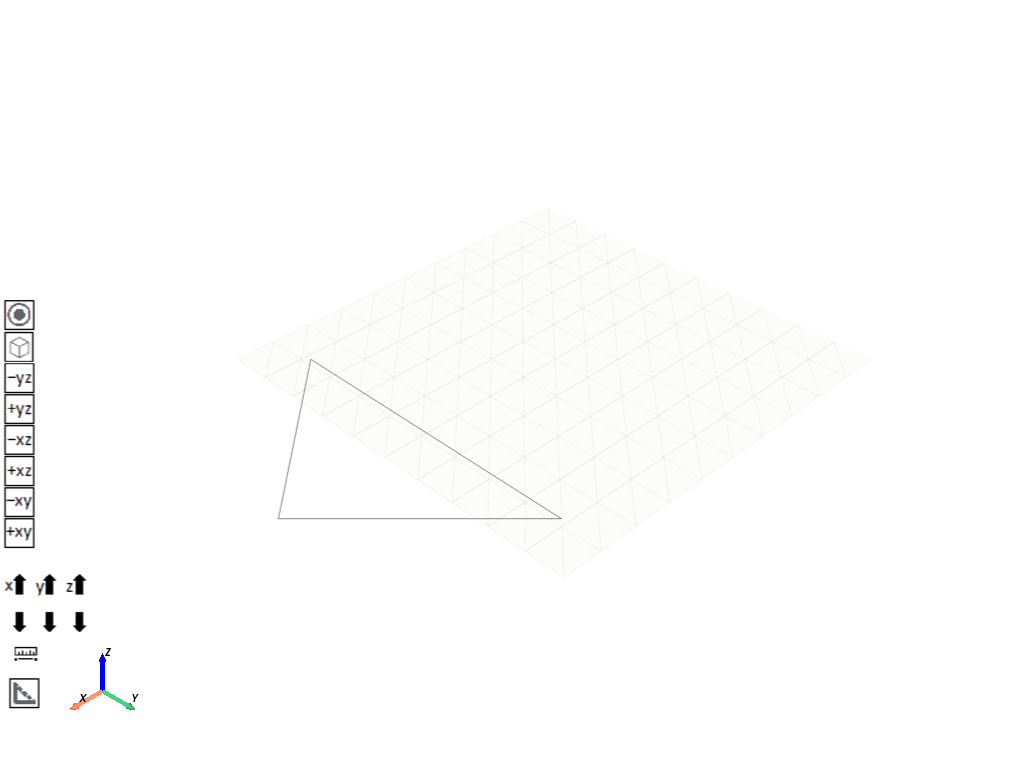

In [15]:
# Draw the triangle sketch profile
sketch = Sketch()
sketch.segment(start=point1, end=point2)
sketch.segment(start=point2, end=point3)
sketch.segment(start=point3, end=point1)

sketch.plot()

#### Create triangular body

Using the sketch profile created in the previous step, use the ``extrude_sketch`` method to
create a solid body with a depth of 1.

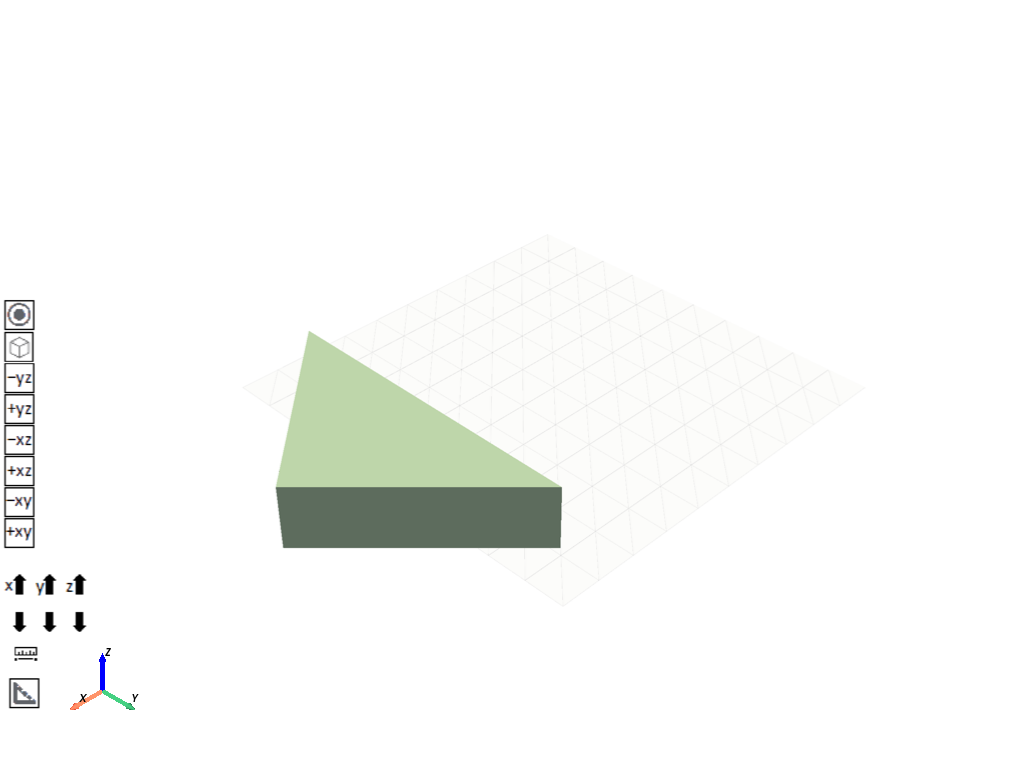

In [16]:
# Extrude the triangular body by a distance of 1
triangle = design.extrude_sketch("triangle_body", sketch, 1)

design.plot()

#### Mirror the triangular body

We will first make a copy of the triangular body, then using ``mirror()``, we will mirror the
copied body over the ZY plane.

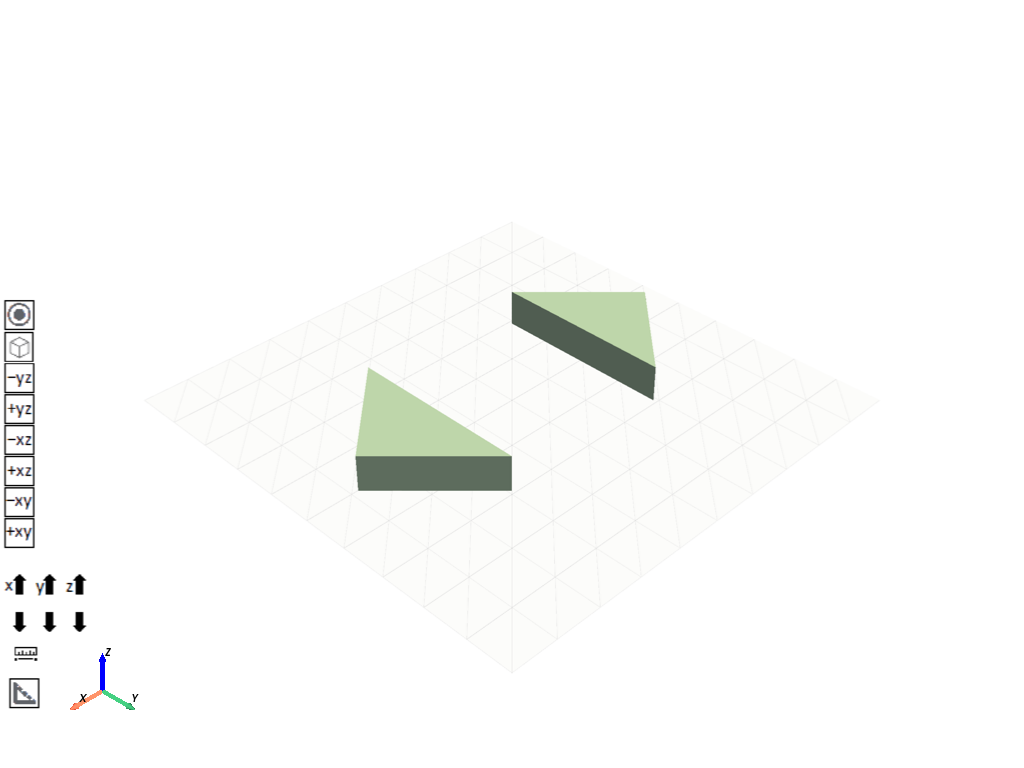

In [17]:
# Copy triangular body
mirrored_triangle = triangle.copy(triangle.parent_component, "mirrored_triangle")
# Mirror the copied body over the ZY plane (specified by the (0, 1, 0) and
# (0, 0, 1) unit vectors)

mirrored_triangle.mirror(Plane(direction_x=UNITVECTOR3D_Y, direction_y=UNITVECTOR3D_Z))

design.plot()